In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np
import pandas_profiling as pp

# 한글출력
import matplotlib.font_manager as fm

font_location = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font',family = font_name)

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import GridSearchCV

import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import statsmodels.formula.api as smf

import pandas_profiling as pp

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN

# 군집분석

In [43]:
df_raw = pd.read_csv('직무능력평가.csv', encoding = 'cp949')

In [7]:
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [8]:
# 데이터 표준화
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)
df_raw_scaled[:5]

array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

In [9]:
# 목표 변수
df_raw_y = df_raw_scaled[:,0]
# 설명 변수
df_raw_x = df_raw_scaled[:,1:]

Text(0, 0.5, 'sample index')

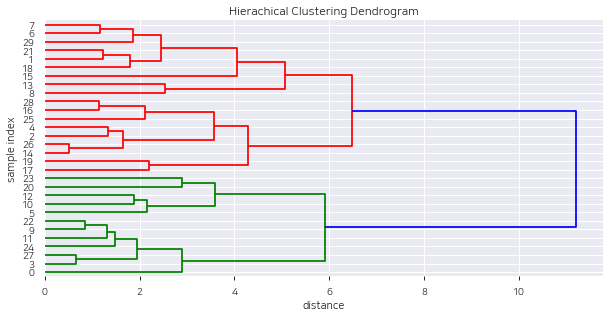

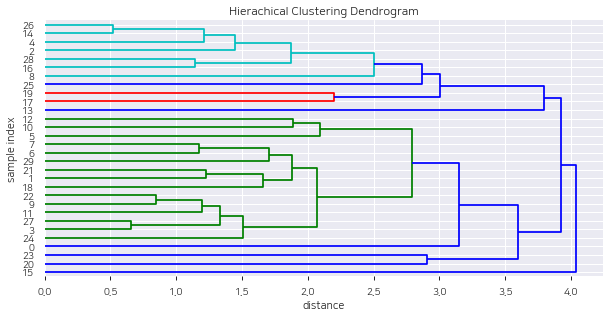

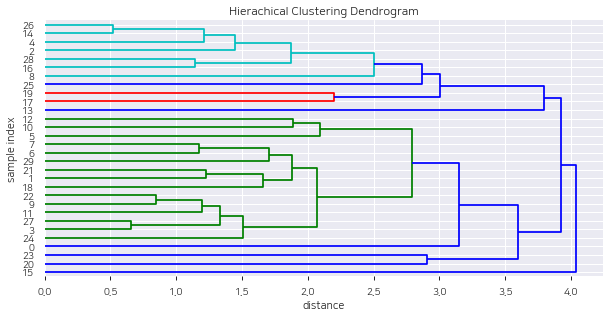

In [17]:
# 연결 : ward, 거리계산 : Euclidean
Z_ward = linkage(df_raw_x, method = "ward", metric = "euclidean")

# 연결 : average, 거리계산 : Euclidean
Z_average = linkage(df_raw_x, method = "average", metric = "euclidean")

# 연결 : average, 거리계산 : minkowski
Z_Minkowski = linkage(df_raw_x, method = "average", metric = "minkowski")

# 덴드로그램[연결 : ward, 거리계산 : Euclidean]
plt.figure(figsize = (10,16))
ax = plt.subplot(311)

# Dataframe 변경 : Z_ward, Z_average, Z_Minkowski
dendrogram(Z_ward, leaf_font_size = 10, orientation = "right")
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

plt.figure(figsize = (10,16))
ax2 = plt.subplot(312)

# Dataframe 변경 : Z_ward, Z_average, Z_Minkowski
dendrogram(Z_average, leaf_font_size = 10, orientation = "right")
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

plt.figure(figsize = (10,16))
ax3 = plt.subplot(313)

# Dataframe 변경 : Z_ward, Z_average, Z_Minkowski
dendrogram(Z_Minkowski, leaf_font_size = 10, orientation = "right")
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

In [22]:
# linkage 함수를 통해 얻은 Z_ward 행렬 데이터를 이용하여 군집 생성
cluster_hierarchical = fcluster(Z = Z_ward, t = 5, criterion = "distance")
# 데이터에 계층형 군집 결과 입력
df_raw['ClusterHierarchical'] = cluster_hierarchical
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierachical,ClusterHierarchical
0,43,51,30,39,61,92,45,1,1
1,63,64,51,54,63,73,47,5,5
2,71,70,68,69,76,86,48,3,3
3,61,63,45,47,54,84,35,1,1
4,81,78,56,66,71,83,47,3,3


In [23]:
# 집계 함수를 이용한 군집별 데이터 요약
ds_summary_hc = df_raw.groupby("ClusterHierarchical").agg(['min','mean','max'])
# 집계 함수를 이용할 경우 열 이름이 두 줄에 걸쳐 나오므로 한 줄로 변환
level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns = level0 + "_" + level1
ds_summary_hc.reset_index(inplace = True)
ds_summary_hc.round(3)

,ClusterHierarchical,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max,ClusterHierachical_min,ClusterHierachical_mean,ClusterHierachical_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,66,74,81.143,92,33,38.571,45,1,1,1
1,2,40,53.200,69,37,49.400,62,33,46.800,57,...,58,49,60.000,67,25,35.000,49,2,2,2
2,3,50,71.889,85,58,73.889,85,54,63.333,71,...,88,74,79.000,86,46,54.667,72,3,3,3
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,71,77,80.000,83,31,33.000,35,4,4,4
4,5,58,69.143,82,61,72.714,90,39,47.143,52,...,75,54,72.000,85,35,40.714,47,5,5,5


In [25]:
# 최대 군집 생성 개수
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    # 각 데이터로부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({'NumberofCluster' : cluster_range,
                        'Error' : clus_error})
ds_error

,NumberofCluster,Error
0,1,180.000000
1,2,114.082503
2,3,93.636837
3,4,79.167866
4,5,67.457870
5,6,59.272353
6,7,56.108581
7,8,45.235578
8,9,38.680456
9,10,32.772266


Text(0, 0.5, 'Sum of squared distance')

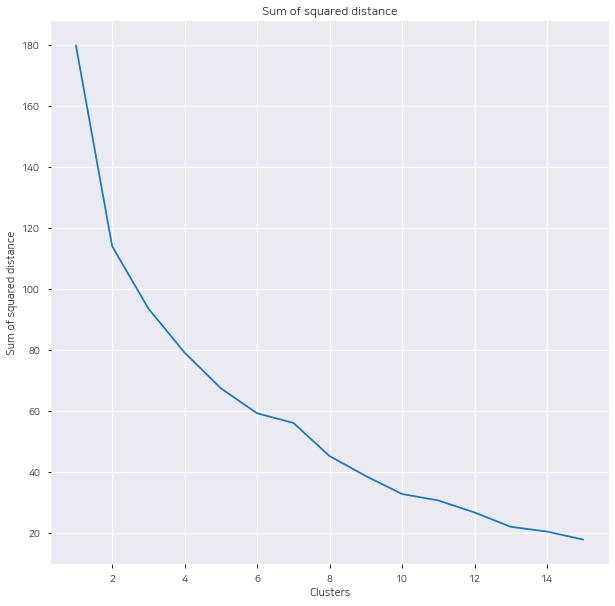

In [26]:
plt.figure(figsize = (10,10))
plt.plot(ds_error['NumberofCluster'], ds_error['Error'])
plt.title("Sum of squared distance")
plt.xlabel('Clusters')
plt.ylabel('Sum of squared distance')

In [27]:
clus = KMeans(5)
clus.fit(df_raw_x)
cluster_kmeans = [i+1 for i in clus.labels_]
df_raw['ClusterKmeans'] = cluster_kmeans
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierachical,ClusterHierarchical,ClusterKmeans
0,43,51,30,39,61,92,45,1,1,2
1,63,64,51,54,63,73,47,5,5,2
2,71,70,68,69,76,86,48,3,3,1
3,61,63,45,47,54,84,35,1,1,2
4,81,78,56,66,71,83,47,3,3,1


In [28]:
ds_summary_km = df_raw.drop('ClusterHierarchical',
                           axis = 1,
                           inplace = False).groupby('ClusterKmeans').agg(['min','mean','max'])
level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns = level0 + "_" + level1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max,ClusterHierachical_min,ClusterHierachical_mean,ClusterHierachical_max
0,1,65,74.625,85,60,75.875,85,54,62.750,71,...,88,74,79.125,86,46,55.000,72,3,3.000,3
1,2,43,58.545,67,51,60.455,70,30,47.455,68,...,75,73,80.364,92,33,41.455,52,1,2.273,5
2,3,40,53.200,69,37,49.400,62,33,46.800,57,...,58,49,60.000,67,25,35.000,49,2,2.000,2
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,71,77,80.000,83,31,33.000,35,4,4.000,4
4,5,58,73.000,82,67,78.500,90,39,45.250,50,...,70,54,66.500,78,35,37.750,41,5,5.000,5


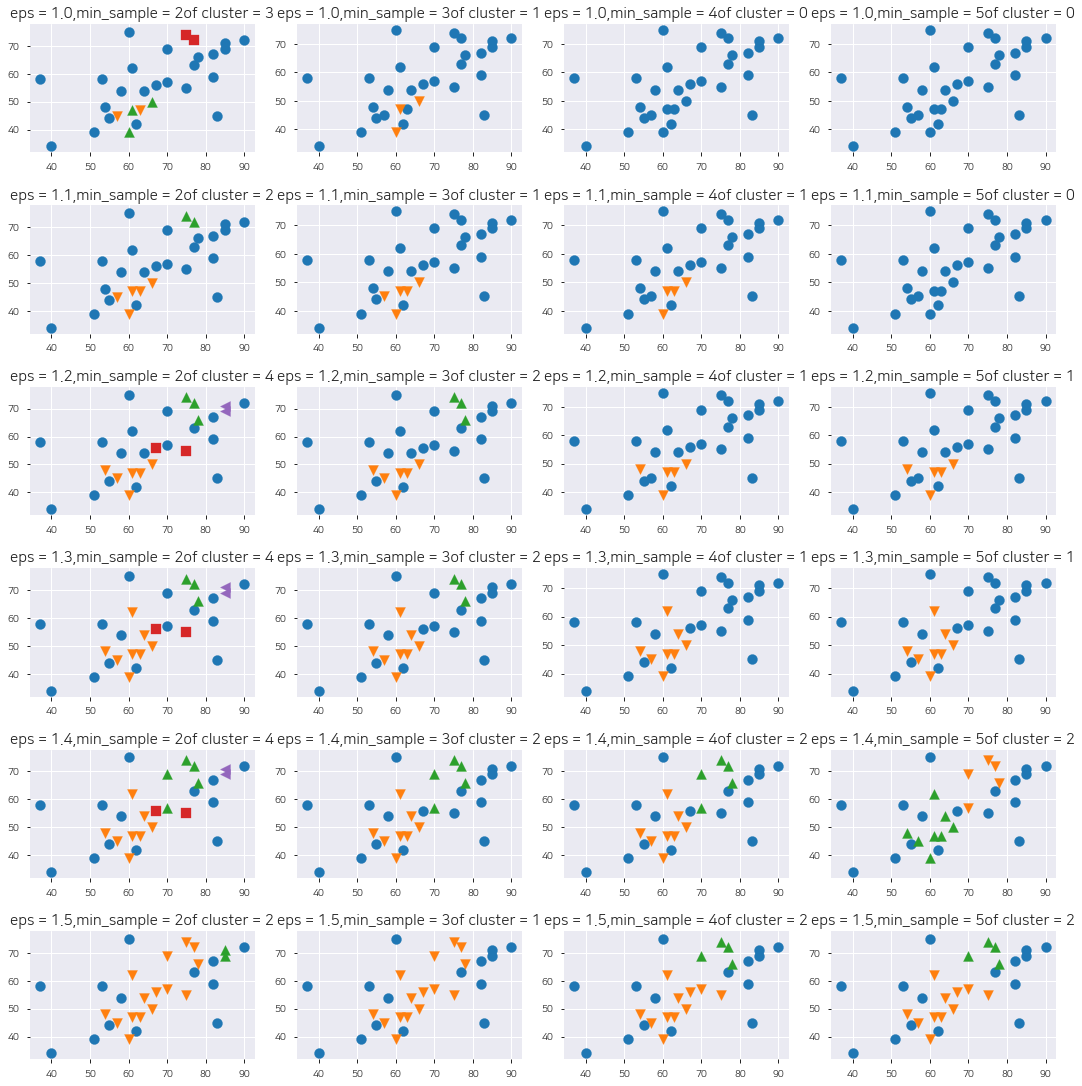

In [30]:
# X축 : DISSATIS, Y축 : CHANCE
X = df_raw['DISSATIS']
Y = df_raw['CHANCE']
# 데이터 point 그림 종류
markers = ['o','v','^','s','<','>','p','D']
# eps : 1.0 ~ 1.5, min_sample : 2 ~ 5
para_eps = [k/10 for k in range(10,16,1)]
para_min_sample = [2,3,4,5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample),
                        figsize = (15,15))
fig.tight_layout(w_pad = 1, h_pad = 3) # plot간 간격
# enumerate() : 값의 index와 값을 순차적으로 반환
for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples = min_sample,
                       eps = eps) # dbscan
        clusters = dbscan.fit_predict(df_raw_x) # 예측 분류
        clusters += 1
        for (n_clus, clus) in enumerate(range(min(clusters), max(clusters) + 1,1)):
            axes[i,j].scatter(X[clusters == clus], Y[clusters == clus], marker = markers[n_clus], s = 100)
            axes[i,j].set_title('eps = '+str(eps) +',min_sample = '+str(min_sample) + 'of cluster = ' + str(max(clusters)), fontsize = 15)

In [31]:
# eps : 특정 데이터로부터 다른 데이터를 포함하는 거리 min_samples : 군집이 되기 위한 최소 데이터 수
dbscan = DBSCAN(eps = 1.4, min_samples = 2).fit(df_raw_x)
# 군집 결과
cluster_dbscan = dbscan.labels_
# sklearn의 DBSCAN에서는 noise 데이터의 경우 군집이 -1로 표시되어 0번 군집부터 시작
# 다른 계층형, K-평균은 1번 군집부터 시작하므로 다른 군집 번호와 통일. Noise 데이터는 0번 군집으로 표기
for (i, val) in enumerate(cluster_dbscan):
    if val < 0:
        cluster_dbscan[i] = 0
    else:
        cluster_dbscan[i] = cluster_dbscan[i] + 1
df_raw['ClusterDBScan'] = cluster_dbscan
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierachical,ClusterHierarchical,ClusterKmeans,ClusterDBScan
0,43,51,30,39,61,92,45,1,1,2,0
1,63,64,51,54,63,73,47,5,5,2,1
2,71,70,68,69,76,86,48,3,3,1,2
3,61,63,45,47,54,84,35,1,1,2,1
4,81,78,56,66,71,83,47,3,3,1,2


In [34]:
# DB 스캔 군집별 요약 통계량
ds_summary_db = df_raw.drop(['ClusterHierarchical',
                            'ClusterKmeans'],
                           axis = 1,
                           inplace = False).groupby('ClusterDBScan').agg(['min','mean','max'])
level0 = ds_summary_db.columns.get_level_values(0)
level1 = ds_summary_db.columns.get_level_values(1)
ds_summary_db.columns = level0 + "_" + level1
ds_summary_db.reset_index(inplace = True)
ds_summary_db.round(3)

,ClusterDBScan,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max,ClusterHierachical_min,ClusterHierachical_mean,ClusterHierachical_max
0,0,40,61.00,82,37,63.846,90,30,54.385,83,...,88,49,70.615,92,25,41.923,72,1,2.923,5
1,1,48,60.75,67,54,60.750,66,42,47.250,52,...,66,73,78.625,84,33,39.125,47,1,2.000,5
2,2,65,74.40,81,70,74.000,78,46,56.400,68,...,80,77,81.800,86,46,47.200,49,3,3.400,5
3,3,58,64.50,71,67,71.000,75,42,46.000,50,...,70,66,67.000,68,35,38.000,41,5,5.000,5
4,4,74,79.50,85,85,85.000,85,64,67.500,71,...,79,74,76.500,79,55,59.000,63,3,3.000,3


# 연관분석

In [36]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [37]:
df_raw = [['소주','콜라','맥주'],
         ['소주','콜라','와인'],
         ['소주','주스'],
         ['콜라','맥주'],
         ['소주','콜라','맥주','와인'],
         ['주스']]
df_raw

[['소주', '콜라', '맥주'],
 ['소주', '콜라', '와인'],
 ['소주', '주스'],
 ['콜라', '맥주'],
 ['소주', '콜라', '맥주', '와인'],
 ['주스']]

In [38]:
# items 중 index 0번이 갖고 있으면 True, 아니면 False
enc = TransactionEncoder()
df_raw_enc = enc.fit_transform(X = df_raw)
# 위의 함수는 데이터를 행렬의 형태로 변환 pandas의 dataframe 형태로 변환
df_asso = pd.DataFrame(df_raw_enc, columns = enc.columns_)
df_asso.head()

,맥주,소주,와인,주스,콜라
0,True,True,False,False,True
1,False,True,True,False,True
2,False,True,False,True,False
3,True,False,False,False,True
4,True,True,True,False,True


In [39]:
# 최소 지지도
min_support = 0.5

# 지지도 계산
df_freq = apriori(df_asso, min_support = 0.5, use_colnames = True)
df_freq.round(3)

,support,itemsets
0,0.500,(맥주)
1,0.667,(소주)
2,0.667,(콜라)
3,0.500,"(맥주, 콜라)"
4,0.500,"(소주, 콜라)"


In [40]:
# 기준 = 신뢰도, 최소신뢰도 = 0.5
df_asso_rule = association_rules(df_freq, metric = "confidence", 
                                min_threshold = 0.5)
df_asso_rule.round(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(맥주),(콜라),0.500,0.667,0.5,1.00,1.500,0.167,inf
1,(콜라),(맥주),0.667,0.500,0.5,0.75,1.500,0.167,2.000
2,(소주),(콜라),0.667,0.667,0.5,0.75,1.125,0.056,1.333
3,(콜라),(소주),0.667,0.667,0.5,0.75,1.125,0.056,1.333


# 지지도 P(A&B) = P(A∩B)/ALL
- 전체 거래수 에서 a와 B가 동시에 구매된 비율. 범위(0,1)

# 신뢰도 P(B|A) = P(A∩B)/P(B)
- A거래에서 A와 B가 동시에 구매된 비율. 범위 (0,1)

# 향상도 P(B|A)/P(B) = P(A∩B) / P(B)*P(A)
- 전체거래수에서 B만 구매한 비율 대비 A를 구매한 경우 B를 동시에 구매한 비율 범위(0,inf)